In [26]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
from scipy.stats.stats import pearsonr
plt.style.use(hep.style.CMS)

matplotlib.rcParams["figure.dpi"] = 300

/tmp/ipykernel_22741/3988268271.py:9: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [29]:
# REGION='control_region'
# REGION='signal_region'
REGION='baseline'

In [30]:
input = "/work/mmalucch/out_hh4b/btag_ratio/out_ERAG_baseline_category_ptflat/output_DATA_JetMET_JMENano_G_2022_postEE_EraG.coffea"
# input = "/work/mmalucch/out_hh4b/btag_ratio/out_ERAG_nobtagcut_category_ptflat/output_DATA_JetMET_JMENano_G_2022_postEE_EraG.coffea"

o = load(f"{input}")
sample=list(o["columns"].keys())[0]
dataset=list(o["columns"][sample].keys())[0]
categories = list(o["columns"][sample][dataset].keys())
print(f"sample: {sample}, dataset: {dataset} categories: {categories}")
col_btag=o["columns"][sample][dataset][REGION]

for k in col_btag.keys():
    print(k)
    col_btag[k]=col_btag[k].value


sample: DATA_JetMET_JMENano_G_skimmed, dataset: DATA_JetMET_JMENano_G_2022_postEE_EraG categories: ['baseline']
weight
JetGood_N
JetGood_pt
JetGood_eta
JetGood_phi
JetGood_mass
JetGood_btagPNetB
events_dR_min
events_Delta_pairing_probabilities
events_Binned_Arctanh_Delta_pairing_probabilities
events_sigma_over_higgs2_reco_mass
events_HT
events_dR_max
events_Padded_Arctanh_Delta_pairing_probabilities
events_sigma_over_higgs1_reco_mass
events_era
events_year
events_Arctanh_Delta_pairing_probabilities
HH_dR
HH_Costhetastar_CS
HH_eta
HH_dPhi
HH_phi
HH_pt
HH_mass
HH_dEta
HiggsLeading_dR
HiggsLeading_eta
HiggsLeading_dPhi
HiggsLeading_helicityCosTheta
HiggsLeading_phi
HiggsLeading_pt
HiggsLeading_mass
HiggsLeading_dEta
HiggsSubLeading_dR
HiggsSubLeading_eta
HiggsSubLeading_dPhi
HiggsSubLeading_helicityCosTheta
HiggsSubLeading_phi
HiggsSubLeading_pt
HiggsSubLeading_mass
HiggsSubLeading_dEta
JetGoodFromHiggsOrdered_N
JetGoodFromHiggsOrdered_phi
JetGoodFromHiggsOrdered_eta
JetGoodFromHiggsOrder

In [31]:
input_bratio = "/work/mmalucch/out_hh4b/btag_ratio/out_ERAG_baseline_category_ptflat_btagratio/output_DATA_JetMET_JMENano_G_2022_postEE_EraG.coffea"
# input_bratio = "/work/mmalucch/out_hh4b/btag_ratio/out_ERAG_nobtagcut_category_ptflat_bratio_all/output_DATA_JetMET_JMENano_G_2022_postEE_EraG.coffea"

o_bratio = load(f"{input_bratio}")
# sample=list(o_bratio["columns"].keys())[0]
# dataset=list(o_bratio["columns"][sample].keys())[0]
# categories = list(o_bratio["columns"][sample][dataset].keys())
# print(f"sample: {sample}, dataset: {dataset} categories: {categories}")
col_btag_ratio=o_bratio["columns"][sample][dataset][REGION]

for k in col_btag_ratio.keys():
    print(k)
    col_btag_ratio[k]=col_btag_ratio[k].value
    

weight
JetGood_N
JetGood_pt
JetGood_eta
JetGood_phi
JetGood_mass
JetGood_btagPNetB
events_dR_min
events_sigma_over_higgs2_reco_mass
events_Padded_Arctanh_Delta_pairing_probabilities
events_sigma_over_higgs1_reco_mass
events_HT
events_year
events_Delta_pairing_probabilities
events_Arctanh_Delta_pairing_probabilities
events_dR_max
events_era
events_Binned_Arctanh_Delta_pairing_probabilities
HH_mass
HH_dR
HH_phi
HH_dEta
HH_pt
HH_Costhetastar_CS
HH_eta
HH_dPhi
HiggsLeading_mass
HiggsLeading_dR
HiggsLeading_phi
HiggsLeading_dEta
HiggsLeading_helicityCosTheta
HiggsLeading_pt
HiggsLeading_eta
HiggsLeading_dPhi
HiggsSubLeading_mass
HiggsSubLeading_dR
HiggsSubLeading_phi
HiggsSubLeading_dEta
HiggsSubLeading_helicityCosTheta
HiggsSubLeading_pt
HiggsSubLeading_eta
HiggsSubLeading_dPhi
JetGoodFromHiggsOrdered_N
JetGoodFromHiggsOrdered_mass
JetGoodFromHiggsOrdered_phi
JetGoodFromHiggsOrdered_pt
JetGoodFromHiggsOrdered_eta
add_jet1pt_mass
add_jet1pt_SubLeadingHiggs_dEta
add_jet1pt_LeadingHiggs_dPhi


In [32]:
print(col_btag)
print(col_btag_ratio)


{'weight': array([1., 1., 1., ..., 1., 1., 1.]), 'JetGood_N': array([5, 4, 4, ..., 4, 4, 4]), 'JetGood_pt': array([159.26736 ,  40.31906 , 107.27101 , ..., 107.483284,  48.54759 ,
       185.77393 ], dtype=float32), 'JetGood_eta': array([ 0.31677246, -2.3300781 , -0.01862717, ...,  1.5712891 ,
        1.9418945 , -1.4074707 ], dtype=float32), 'JetGood_phi': array([-2.5141602 , -0.703125  , -2.0722656 , ..., -3.133789  ,
       -0.05323029,  0.44067383], dtype=float32), 'JetGood_mass': array([15.933253 ,  5.2660313, 14.528913 , ..., 21.728565 ,  6.339523 ,
       24.014034 ], dtype=float32), 'JetGood_btagPNetB': array([0.99560547, 0.79589844, 0.38916016, ..., 0.9868164 , 0.01094055,
       0.0075798 ], dtype=float32), 'events_dR_min': array([0.55476451, 0.56277746, 0.4554897 , ..., 0.82337576, 0.66142666,
       0.83342403]), 'events_Delta_pairing_probabilities': array([0.00976745, 0.47674659, 0.01530784, ..., 0.49801291, 0.00355733,
       0.45044757]), 'events_Binned_Arctanh_Delta_pai

In [33]:
btag_spanet=col_btag["JetGood_btagPNetB"]
btag_spanet_unflattened=ak.unflatten(btag_spanet, col_btag["JetGood_N"])
pd_spanet=col_btag["events_Arctanh_Delta_pairing_probabilities"]

btag_spanet_ratio=col_btag_ratio["JetGood_btagPNetB"]
btag_spanet_ratio_unflattened=ak.unflatten(btag_spanet_ratio, col_btag_ratio["JetGood_N"])
pd_spanet_ratio=col_btag_ratio["events_Arctanh_Delta_pairing_probabilities"]

In [34]:
print(f"btag_spanet: {btag_spanet}")
print(f"btag_spanet_ratio: {btag_spanet_ratio}")

print(f"pd_spanet: {pd_spanet}")
print(f"pd_spanet_ratio: {pd_spanet_ratio}")


btag_spanet: [0.99560547 0.79589844 0.38916016 ... 0.9868164  0.01094055 0.0075798 ]
btag_spanet_ratio: [0.99560547 0.79589844 0.38916016 ... 0.9868164  0.01094055 0.0075798 ]
pd_spanet: [0.00976776 0.51876541 0.01530904 ... 0.54666018 0.00355735 0.48526163]
pd_spanet_ratio: [0.39143464 0.22332517 0.67478176 ... 0.00511089 0.18508579 0.00192349]


In [35]:
def correlation_plot(btag, pd, title):
    # compute the correlation between the btag of the 3rd jet and the pd 
    plt.figure(figsize=(12, 12))
    # put the log in the color scale
    plt.hist2d(
        btag,
        pd,
        bins=(np.linspace(0, 1, 100), np.linspace(0, 8, 100)),
        cmap="viridis",
        cmin=1,
        norm=matplotlib.colors.LogNorm(),
        density=False,
        weights=np.ones_like(pd)
    )
    # plt.xlabel("btag of the 3rd jet (spanet )")
    # plt.ylabel("Pairing probability (spanet )")
    plt.colorbar(label="Counts")

    # compute the correlation coefficient
    corr, _ = pearsonr(btag, pd)
    print(f"Pearson correlation coefficient (spanet ): {corr:.2f}")
    
    plt.title(f"{title} \nPearson correlation coefficient: {corr:.2f}")
    
    plt.show()
    
    
    # plot the scatter plot
    # plt.scatter(btag, pd, s=1, alpha=0.5, color='red')
    # plt.title(f"{title} \nPearson correlation coefficient: {corr:.2f}")
    # plt.show()

Pearson correlation coefficient (spanet ): -0.09


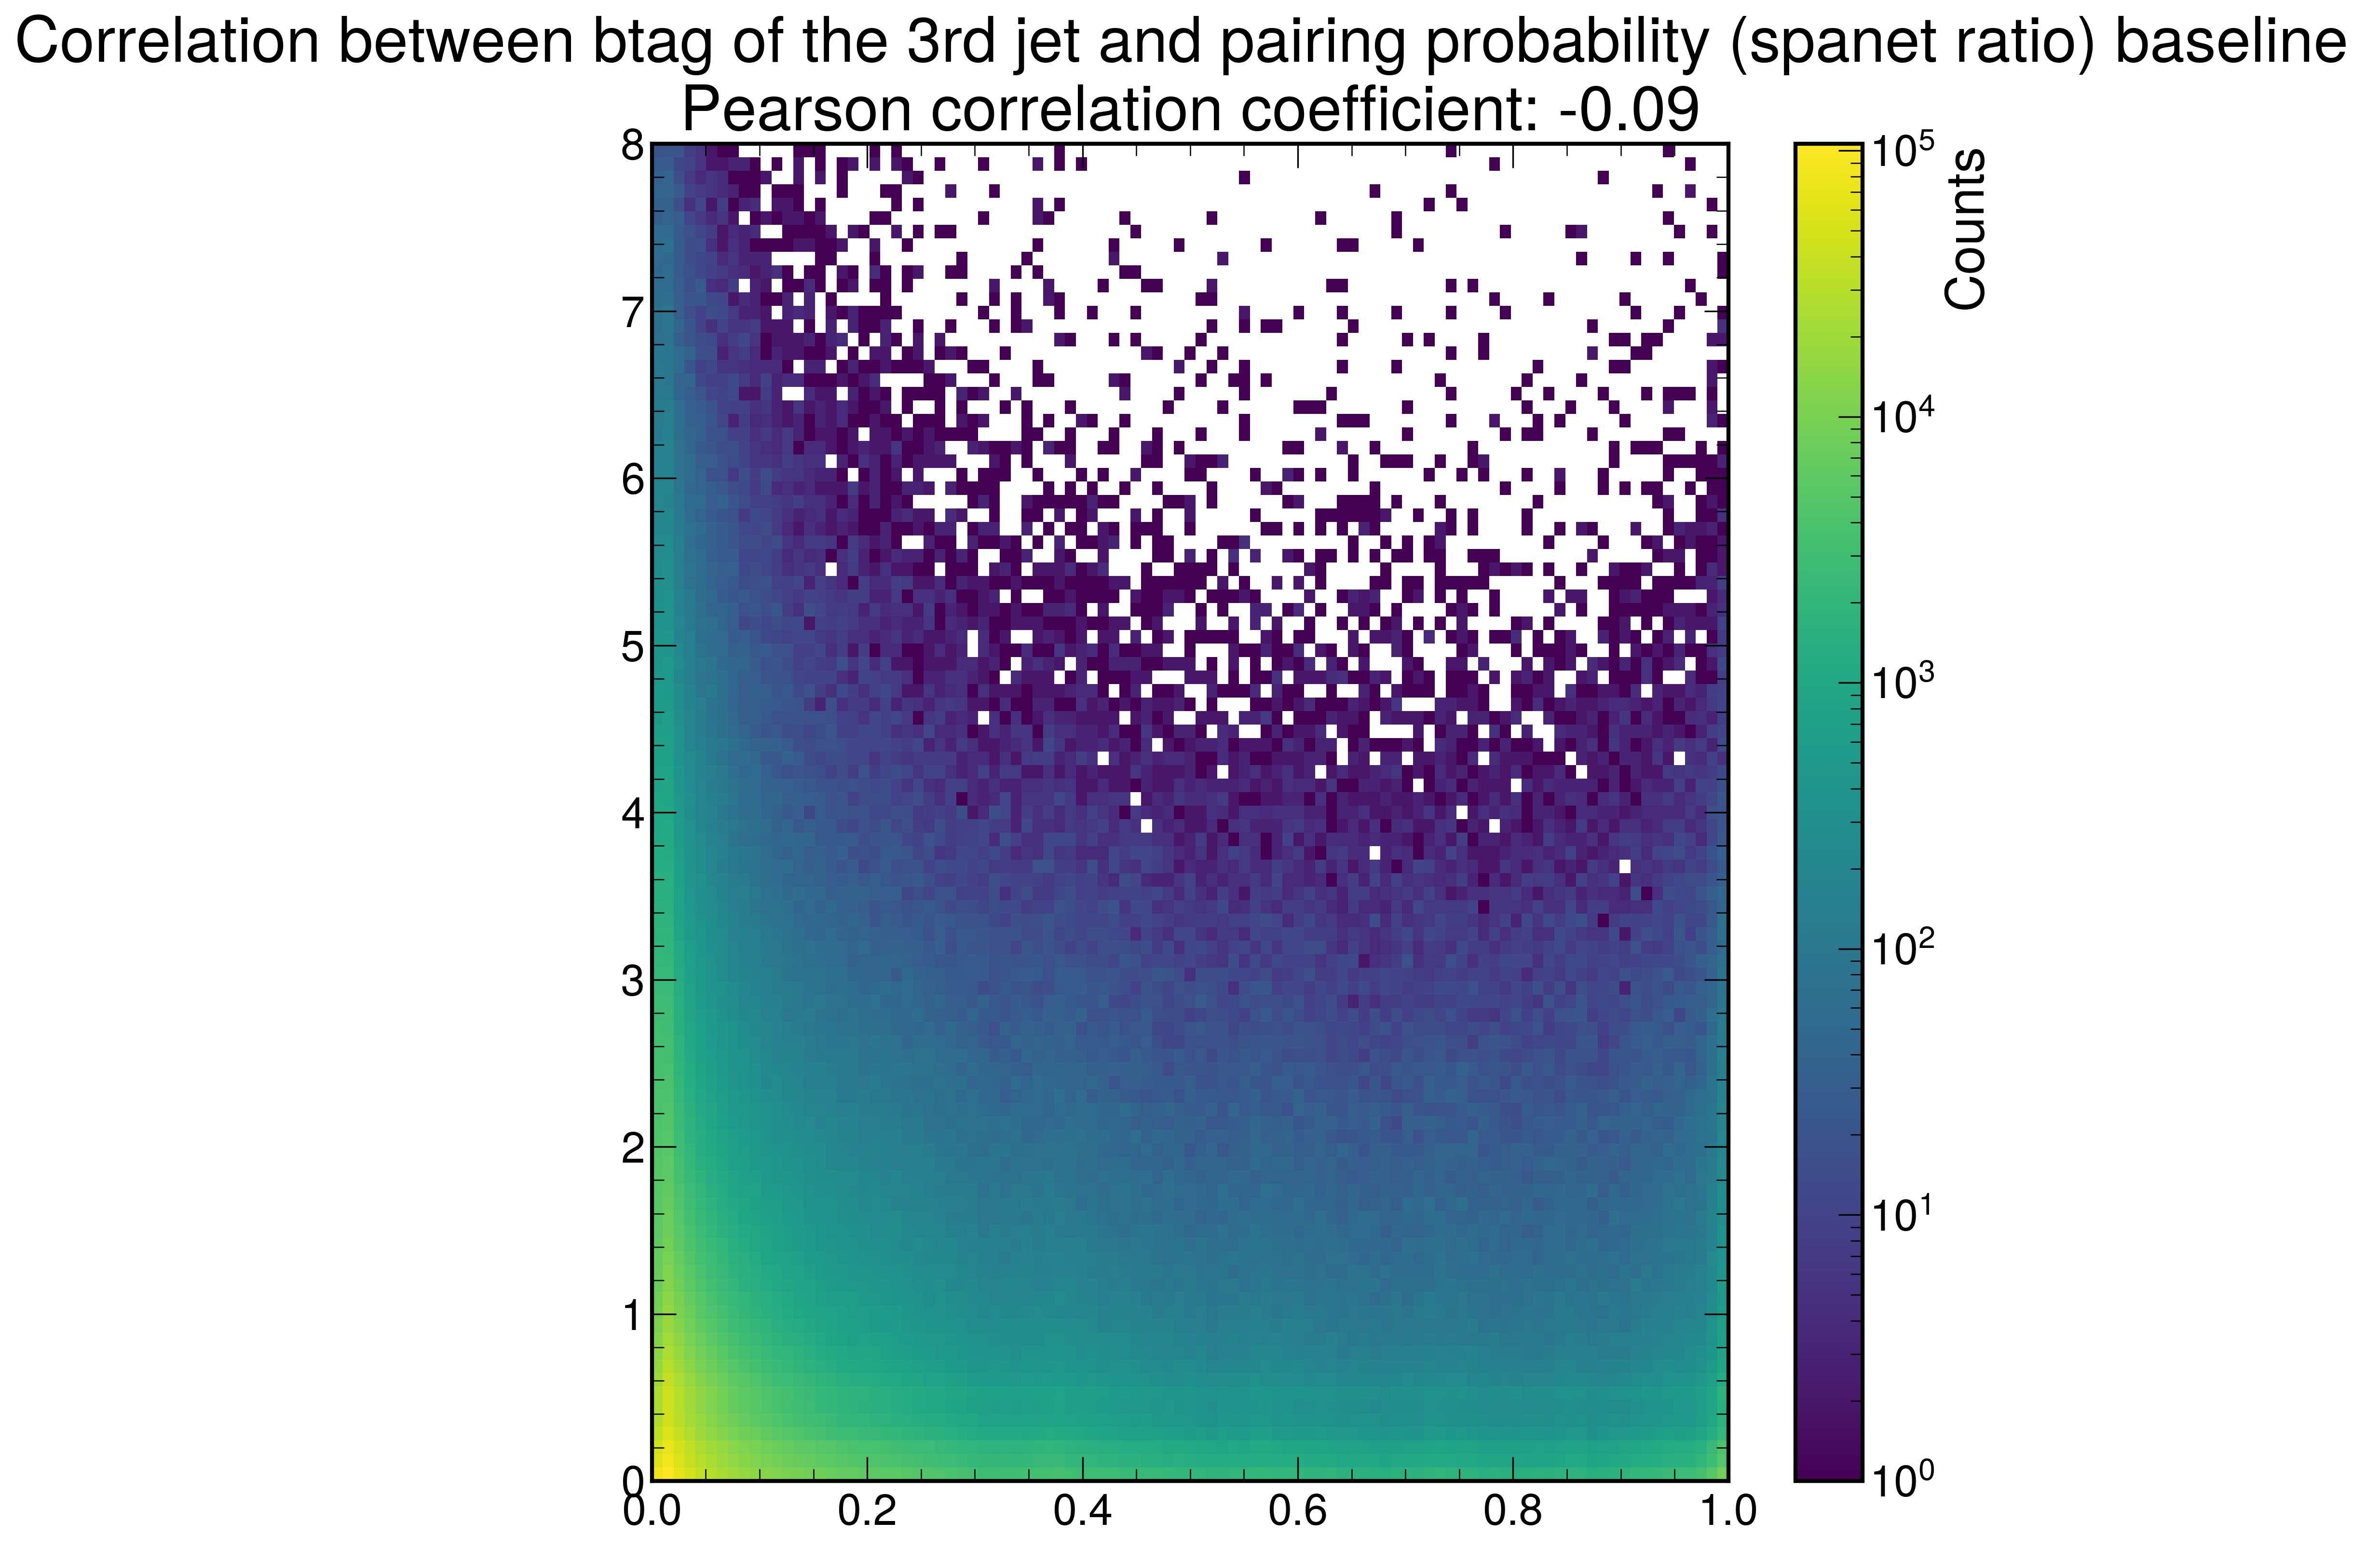

Pearson correlation coefficient (spanet ): 0.14


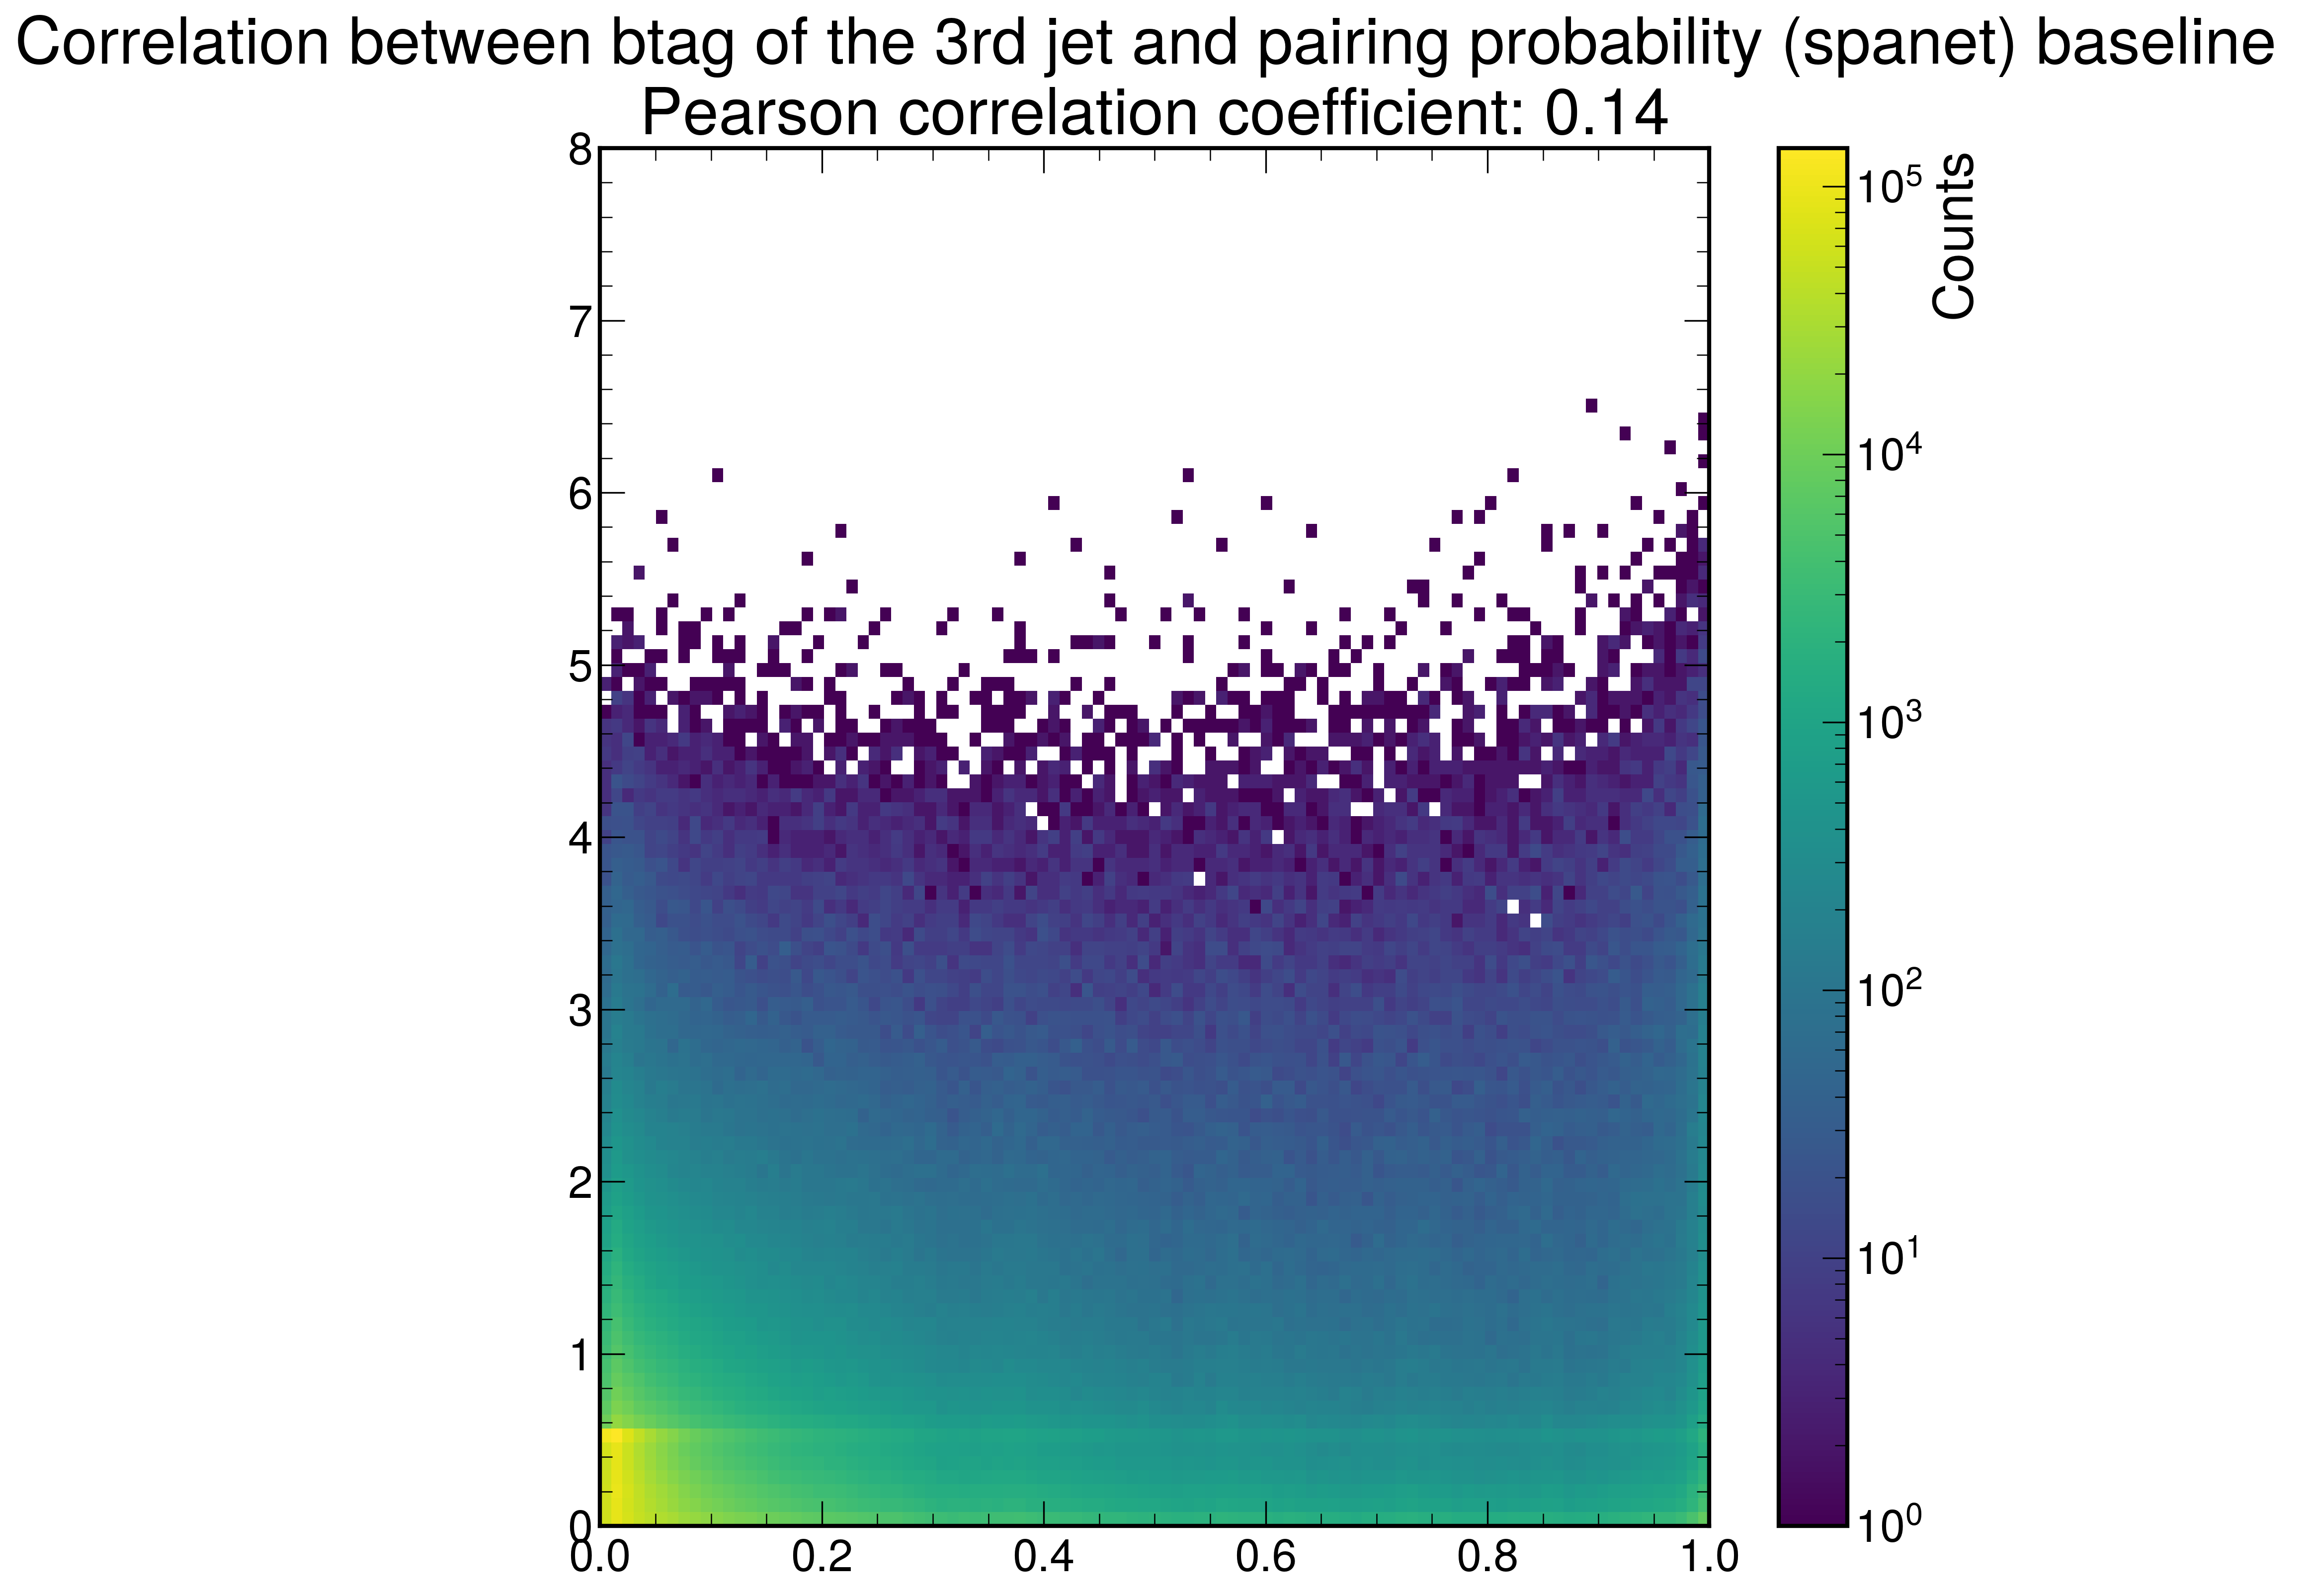

Pearson correlation coefficient (spanet ): -0.07


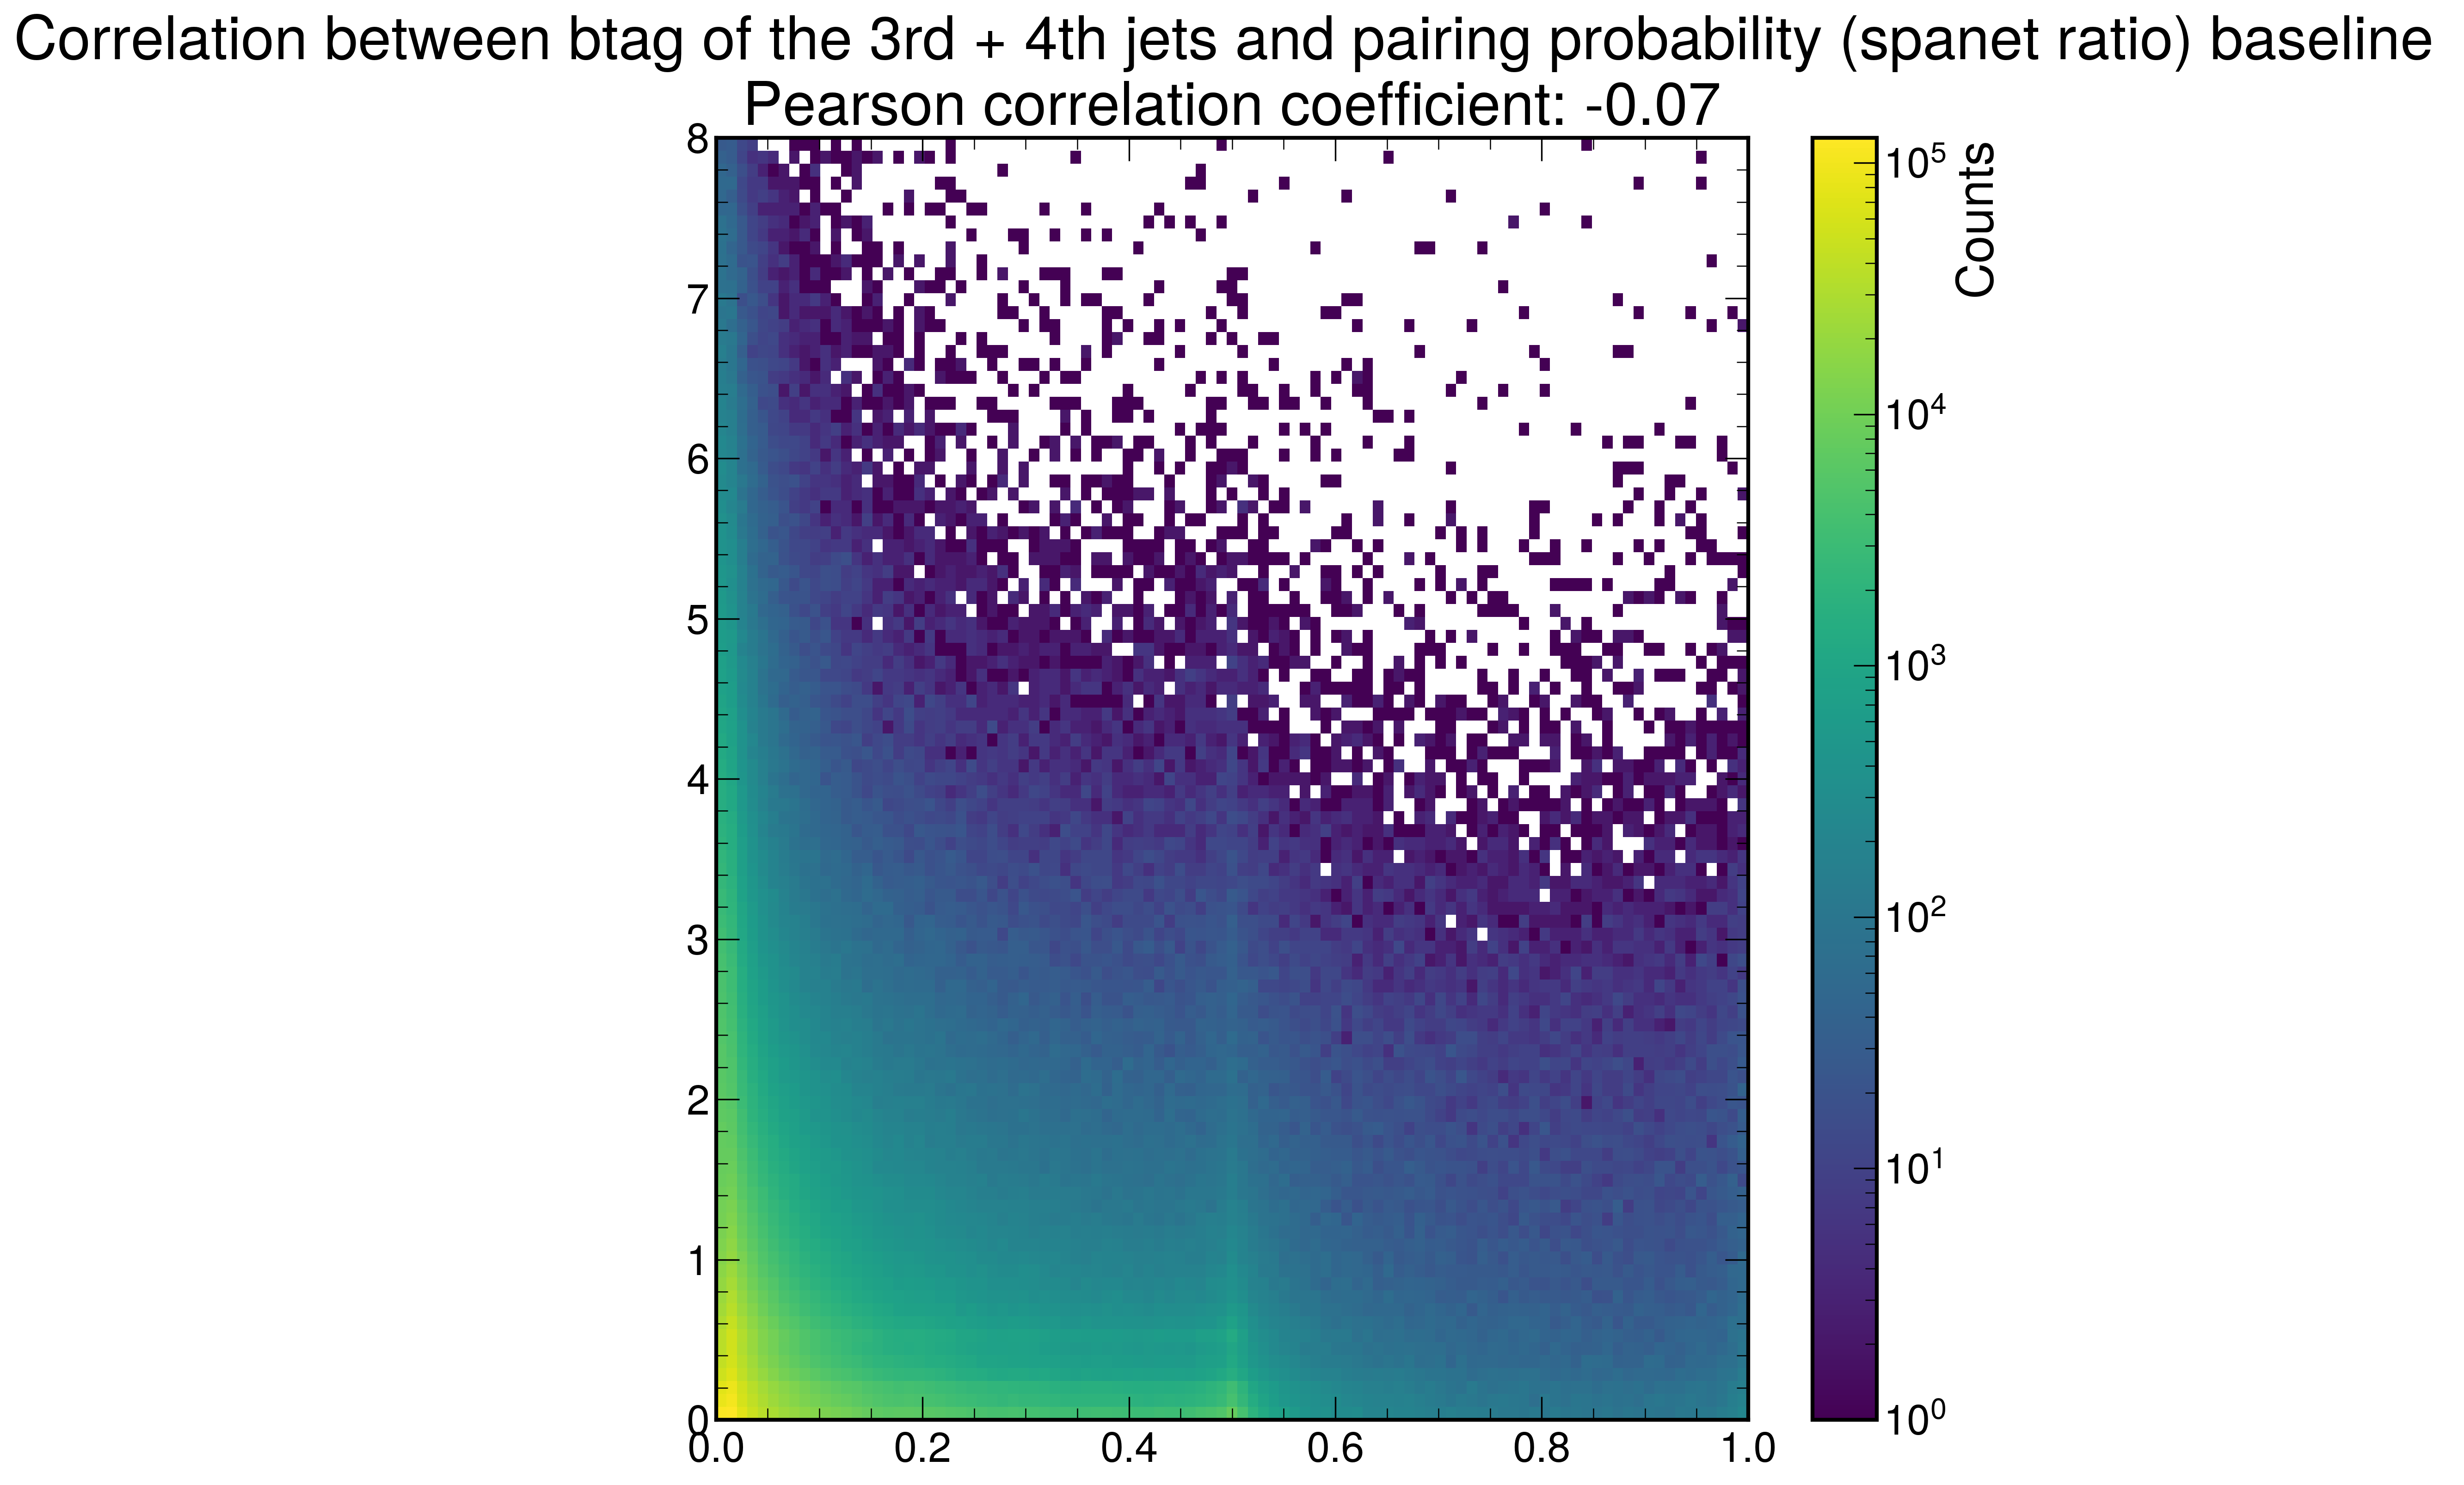

Pearson correlation coefficient (spanet ): 0.19


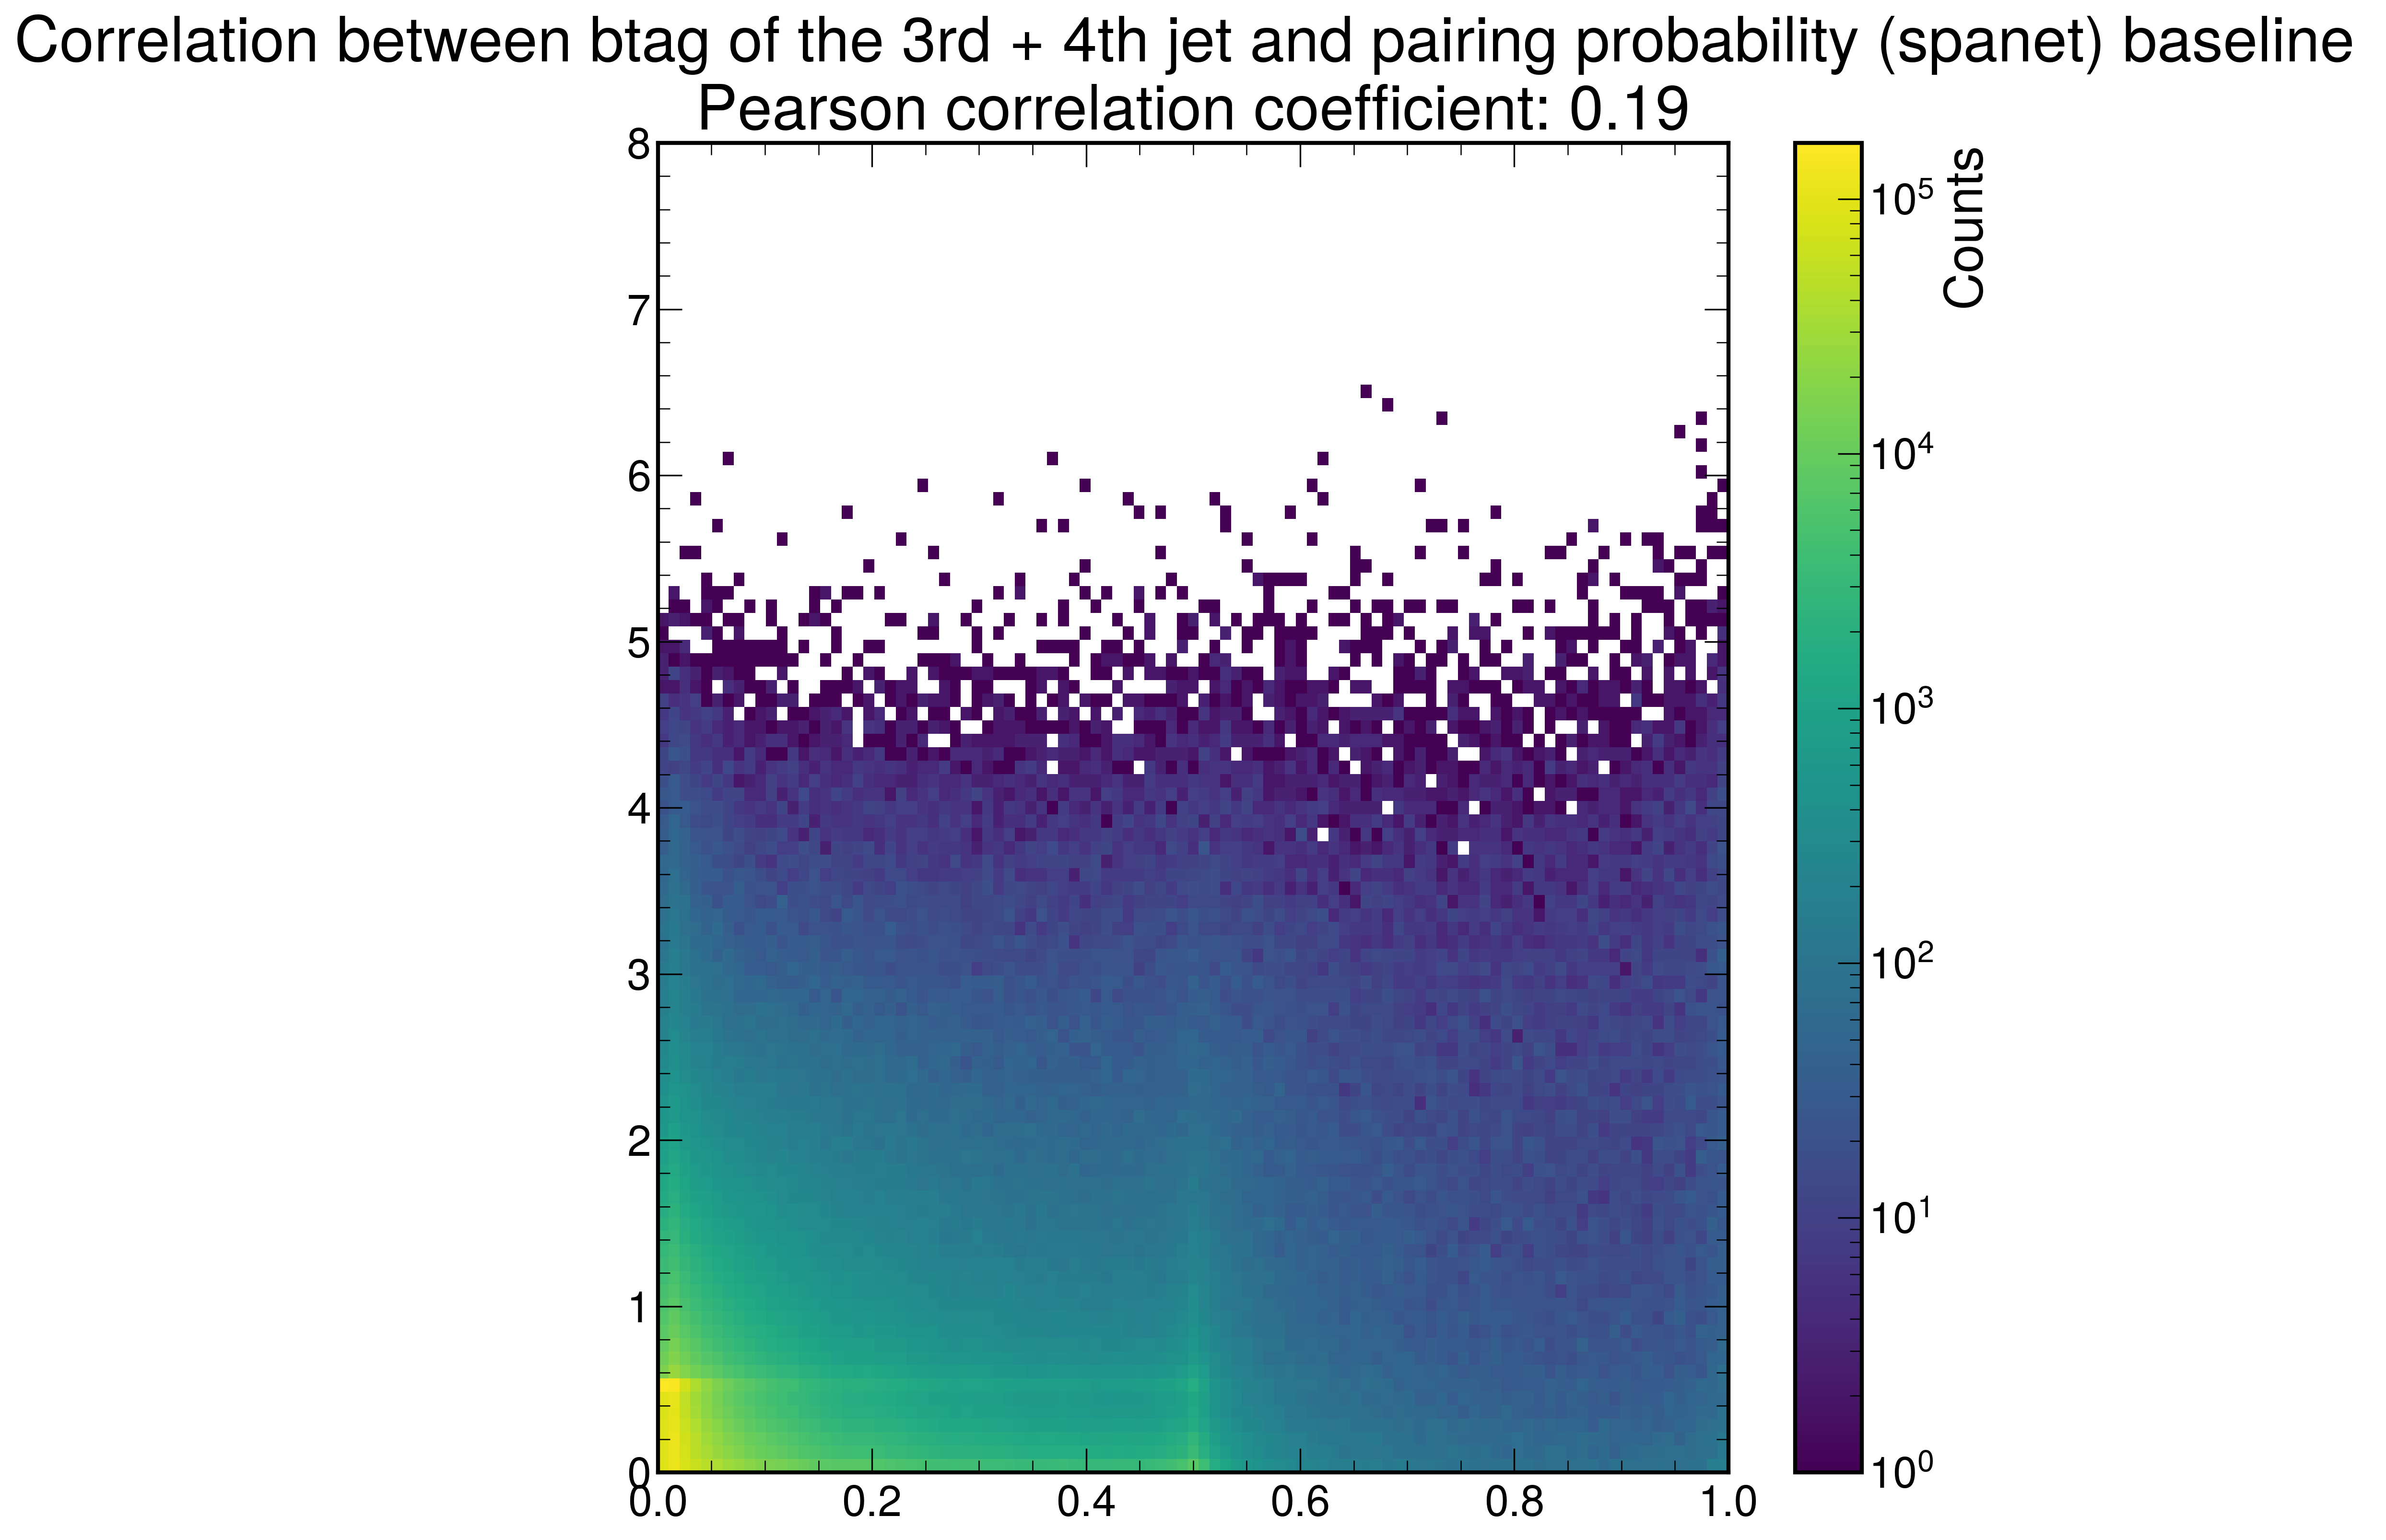

In [36]:
correlation_plot(btag_spanet_ratio_unflattened[:,2], pd_spanet_ratio, "Correlation between btag of the 3rd jet and pairing probability (spanet ratio) "+REGION)
correlation_plot(btag_spanet_unflattened[:,2], pd_spanet, "Correlation between btag of the 3rd jet and pairing probability (spanet) "+REGION)


correlation_plot((btag_spanet_ratio_unflattened[:,2]+btag_spanet_ratio_unflattened[:,3])/2, pd_spanet_ratio, "Correlation between btag of the 3rd + 4th jets and pairing probability (spanet ratio) "+REGION)
correlation_plot((btag_spanet_unflattened[:,2]+btag_spanet_unflattened[:,3])/2, pd_spanet, "Correlation between btag of the 3rd + 4th jet and pairing probability (spanet) "+REGION)


In [37]:
if False:
    # plot the btag of the 3rd jet
    plt.figure(figsize=(6, 6))
    plt.hist(
        btag_spanet_ratio_unflattened[:,2],
        bins=50,
        range=(0, 1),
        histtype="step",
        label="btag of the 3rd jet (spanet ratio)",
    )
    plt.xlabel("btag of the 3rd jet (spanet ratio)")
    plt.ylabel("Counts")
    plt.legend()
    plt.show()



In [38]:
x = np.linspace(0, 1, 100)
y=2*x+np.random.normal(0, 10000, 100)

# compute the correlation between x and y
corr, _ = pearsonr(x, y)
corr_np=np.corrcoef(x,y)
print(f"Pearson correlation coefficient (x, y): {corr:.6f}")

print(f"Pearson correlation coefficient (x, y) numpy: {corr_np[0,1]:.6f}")

Pearson correlation coefficient (x, y): -0.117067
Pearson correlation coefficient (x, y) numpy: -0.117067


# compare prob diff between two models

In [39]:

def get_cols(input_data, input_mc, title, category_4, category_2):
    bins=np.linspace(0, 8, 50)
    o_d = load(input_data)
    sample_d=list(o_d["columns"].keys())[0]
    dataset_d=list(o_d["columns"][sample_d].keys())[0]
    
    o_m = load(input_mc)
    sample_m=list(o_m["columns"].keys())[0]
    dataset_m=list(o_m["columns"][sample_m].keys())[0]


    print(f"Data: {sample_d} {dataset_d}")
    print(f"MC: {sample_m} {dataset_m}")
    col_d = o_d["columns"][sample_d][dataset_d][category_4]
    col_m = o_m["columns"][sample_m][dataset_m][category_4]

    
    col_d2 = o_d["columns"][sample_d][dataset_d][category_2]
    
    adp_d=col_d["events_Arctanh_Delta_pairing_probabilities"].value
    adp_m=col_m["events_Arctanh_Delta_pairing_probabilities"].value
    adp_d2=col_d2["events_Arctanh_Delta_pairing_probabilities"].value
    
    # plot the columns histograms
    # plot aloso the ratio 
    fig, (ax, ax_ratio) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
    plt.title(f'Arctanh Delta pairing probabilities distribution for {title}')
    ax.hist(adp_d, bins=bins, histtype='step', label=f'Data {category_4}', color='blue', alpha=0.7, density=True)
    ax.hist(adp_m, bins=bins, histtype='step', label=f'HH4b {category_4}', color='red', alpha=0.7, density=True)
    ax.hist(adp_d2, bins=bins, histtype='step', label=f'Data {category_2}', color='green', alpha=0.7, density=True)
    plt.xlabel('Arctanh Delta pairing probabilities')
    plt.ylabel('Number of events')
    # log scale
    ax.legend()
    ax.set_yscale('log')
    plt.grid()
    plt.tight_layout()
    
    # plot the ratio d and d2
    # get the histogram
    hist_d, edges_d = np.histogram(adp_d, bins=bins, density=True)
    hist_m, edges_m = np.histogram(adp_m, bins=bins, density=True)
    hist_d2, edges_d2 = np.histogram(adp_d2, bins=bins, density=True)
    # compute the bin centers
    bin_centers_d = 0.5 * (edges_d[:-1] + edges_d[1:])
    ratio_d = hist_d / hist_m
    ratio_d2 = hist_d / hist_d2
    
    # plot the ratio
    # ax_ratio.plot(bin_centers_d, ratio_d, label='Data 4b / Signal 4b', color='blue')
    ax_ratio.plot(bin_centers_d, ratio_d2, label='Data 4b / Data 2b', color='green')
    ax_ratio.set_xlabel('Arctanh Delta pairing probabilities')
    ax_ratio.set_ylabel('Ratio')
    ax_ratio.axhline(1, color='black', linestyle='--', label='Ratio = 1')
    ax_ratio.legend()
    ax_ratio.grid()
    ax_ratio.legend()
    plt.tight_layout()
    plt.show()
    
    
    

    return col_d, col_m, col_d2



Data: DATA_JetMET_JMENano_G_skimmed DATA_JetMET_JMENano_G_2022_postEE_EraG
MC: GluGlutoHHto4B_spanet_skimmed GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE


/tmp/ipykernel_22741/129818186.py:46: RuntimeWarning: invalid value encountered in divide
  ratio_d = hist_d / hist_m
/tmp/ipykernel_22741/129818186.py:47: RuntimeWarning: divide by zero encountered in divide
  ratio_d2 = hist_d / hist_d2
/tmp/ipykernel_22741/129818186.py:47: RuntimeWarning: invalid value encountered in divide
  ratio_d2 = hist_d / hist_d2


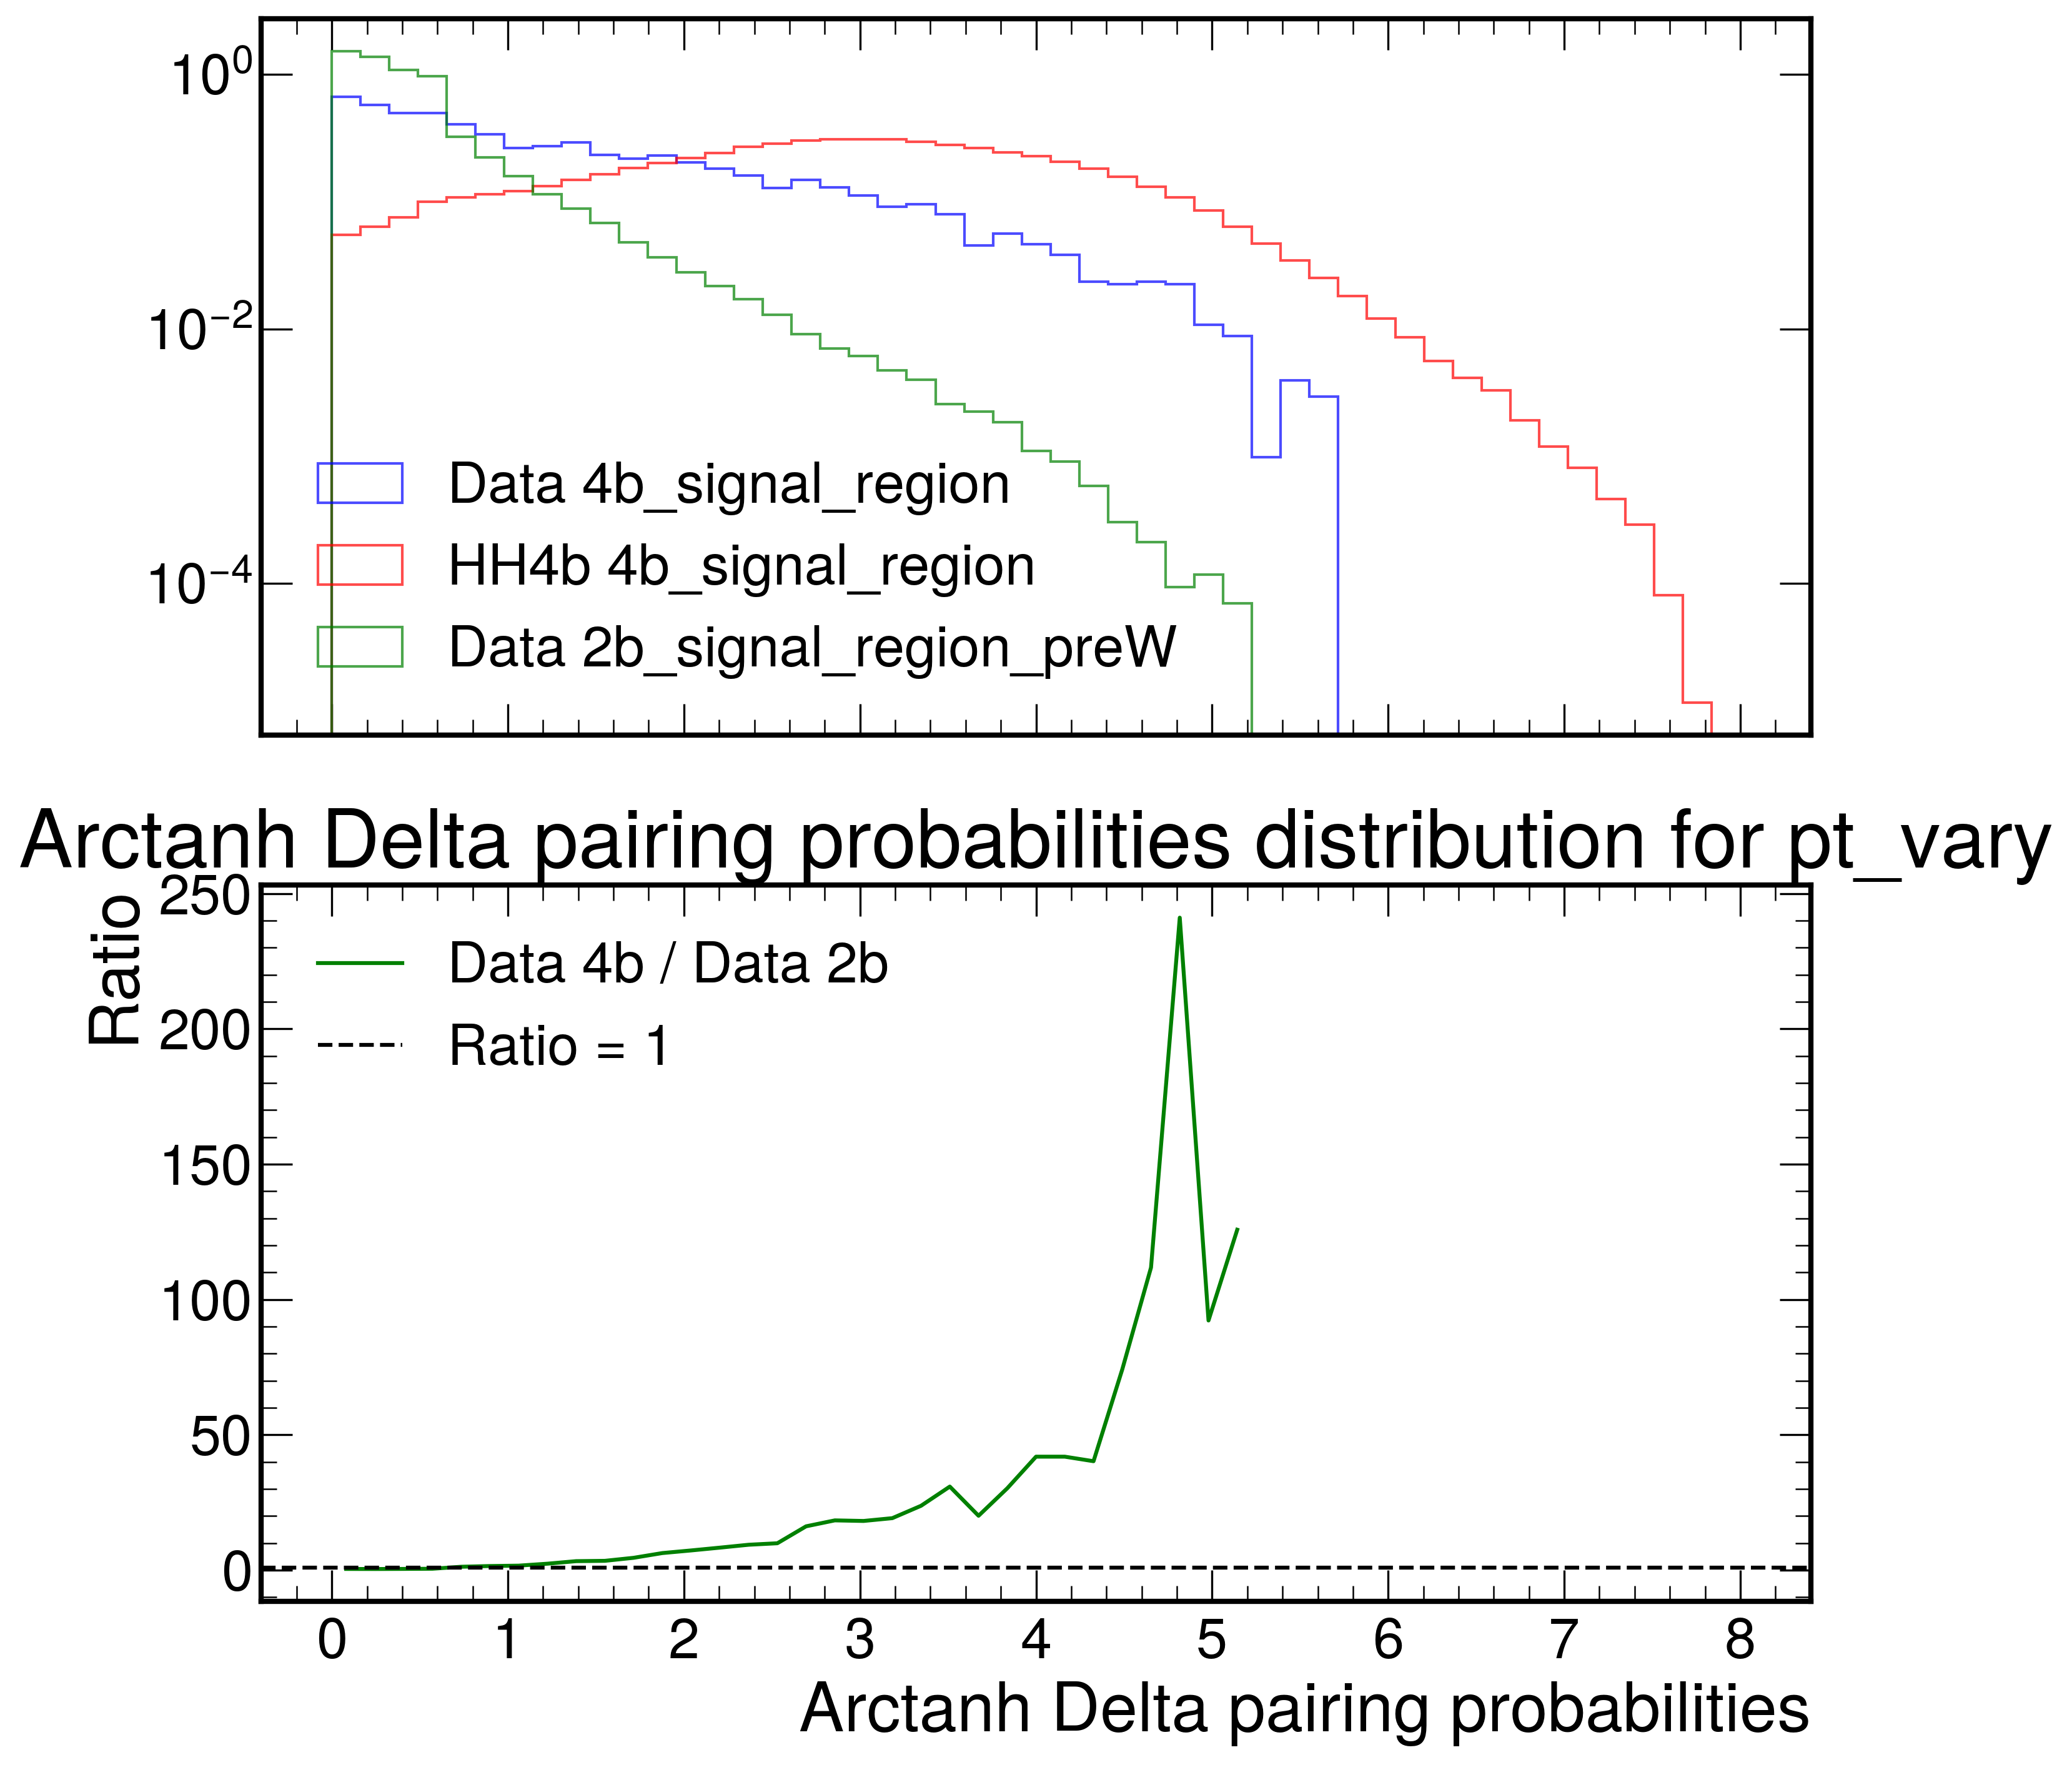

Data: DATA_JetMET_JMENano_G_skimmed DATA_JetMET_JMENano_G_2022_postEE_EraG
MC: GluGlutoHHto4B_spanet_skimmed GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE


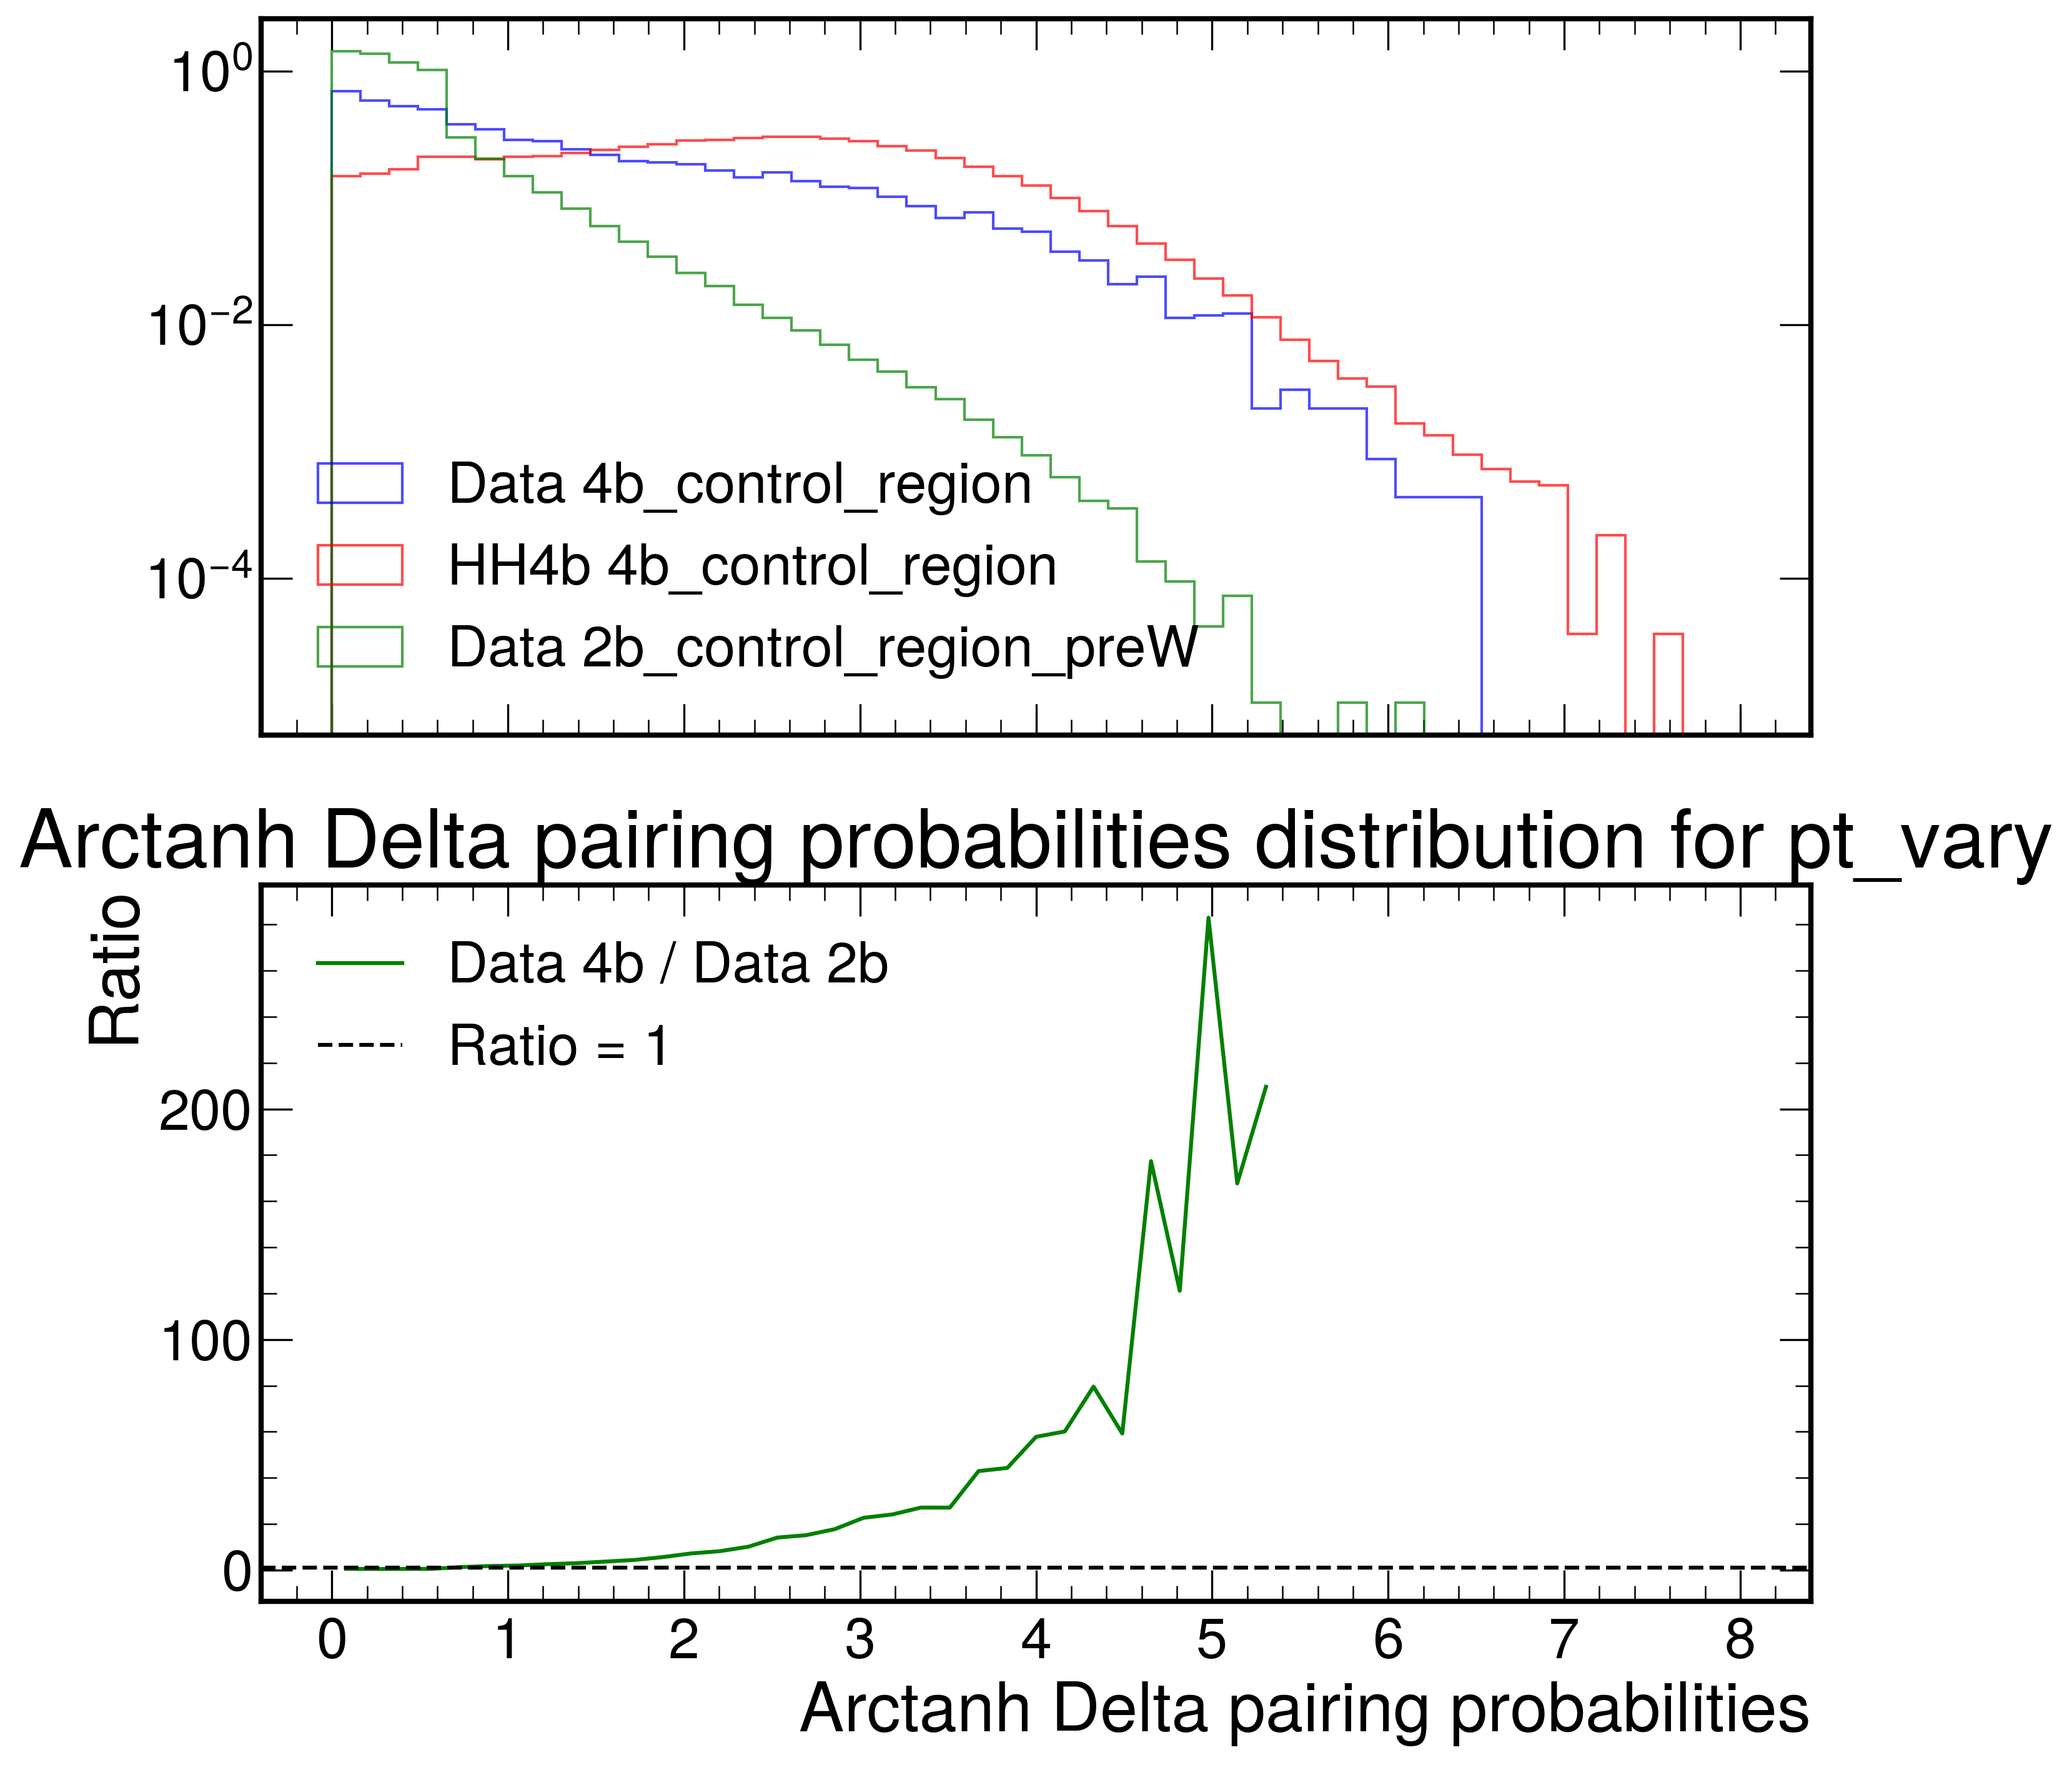

Data: DATA_JetMET_JMENano_G_skimmed DATA_JetMET_JMENano_G_2022_postEE_EraG
MC: GluGlutoHHto4B_spanet_skimmed GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE


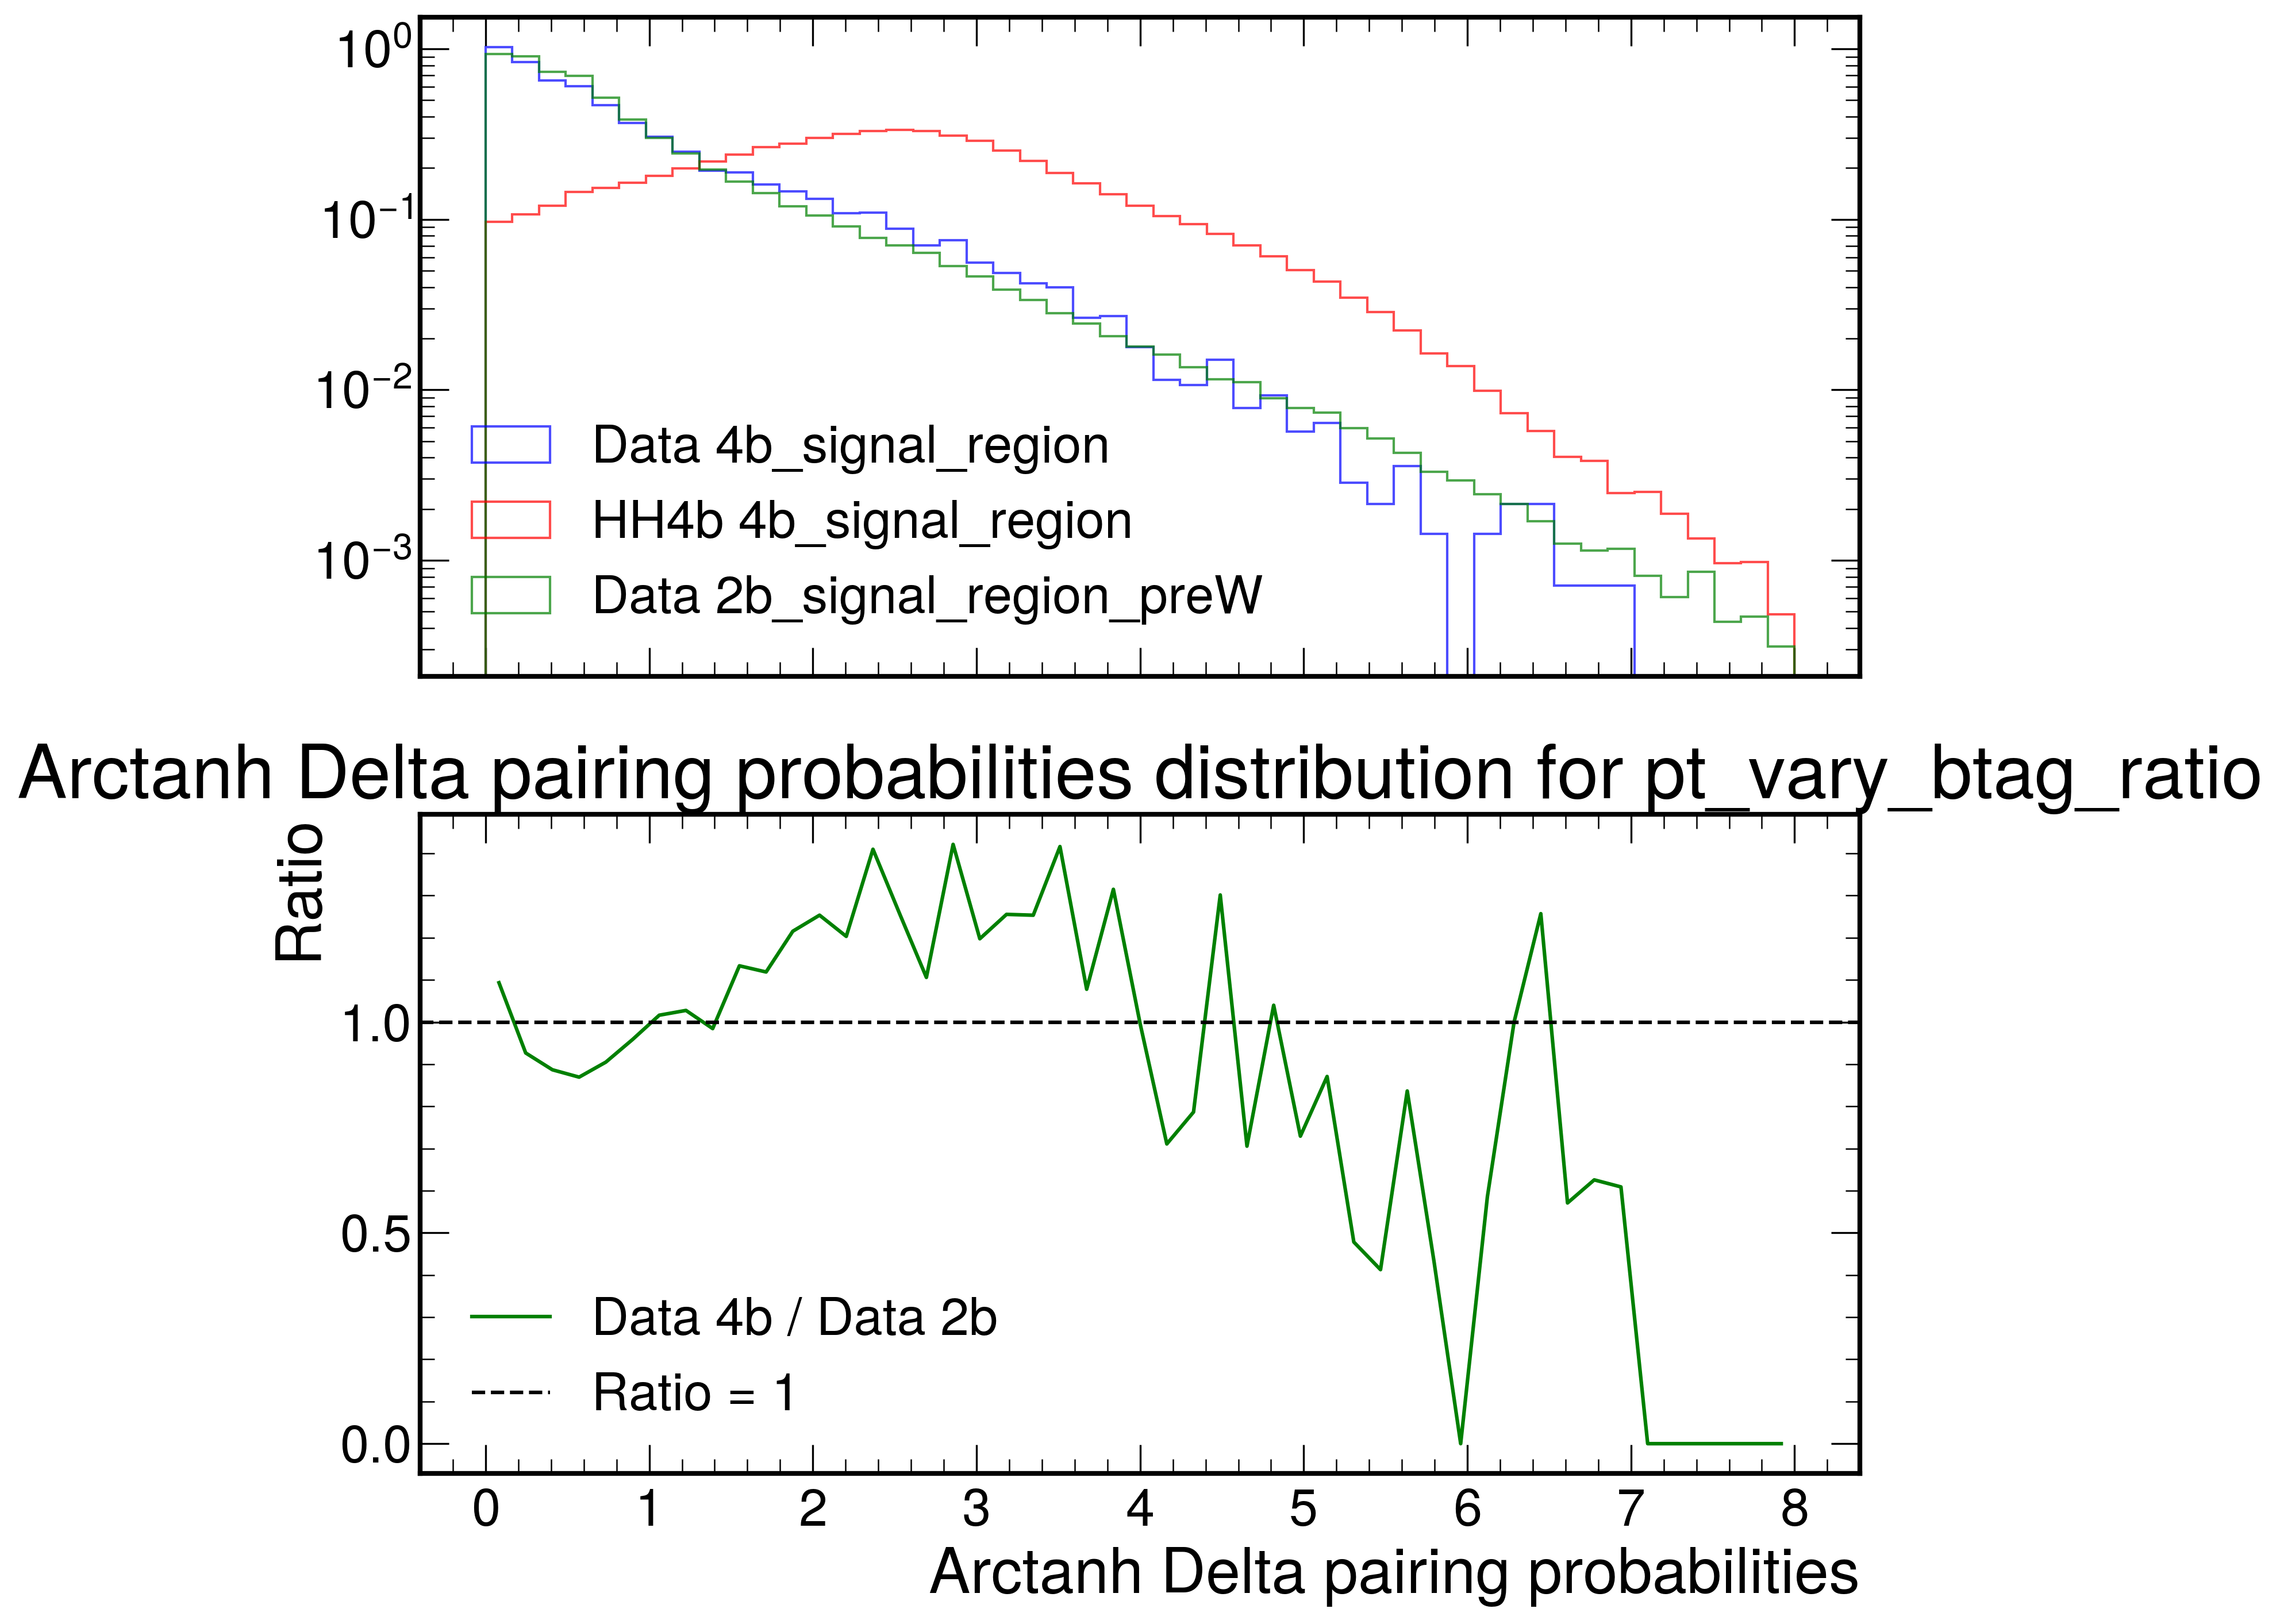

Data: DATA_JetMET_JMENano_G_skimmed DATA_JetMET_JMENano_G_2022_postEE_EraG
MC: GluGlutoHHto4B_spanet_skimmed GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE


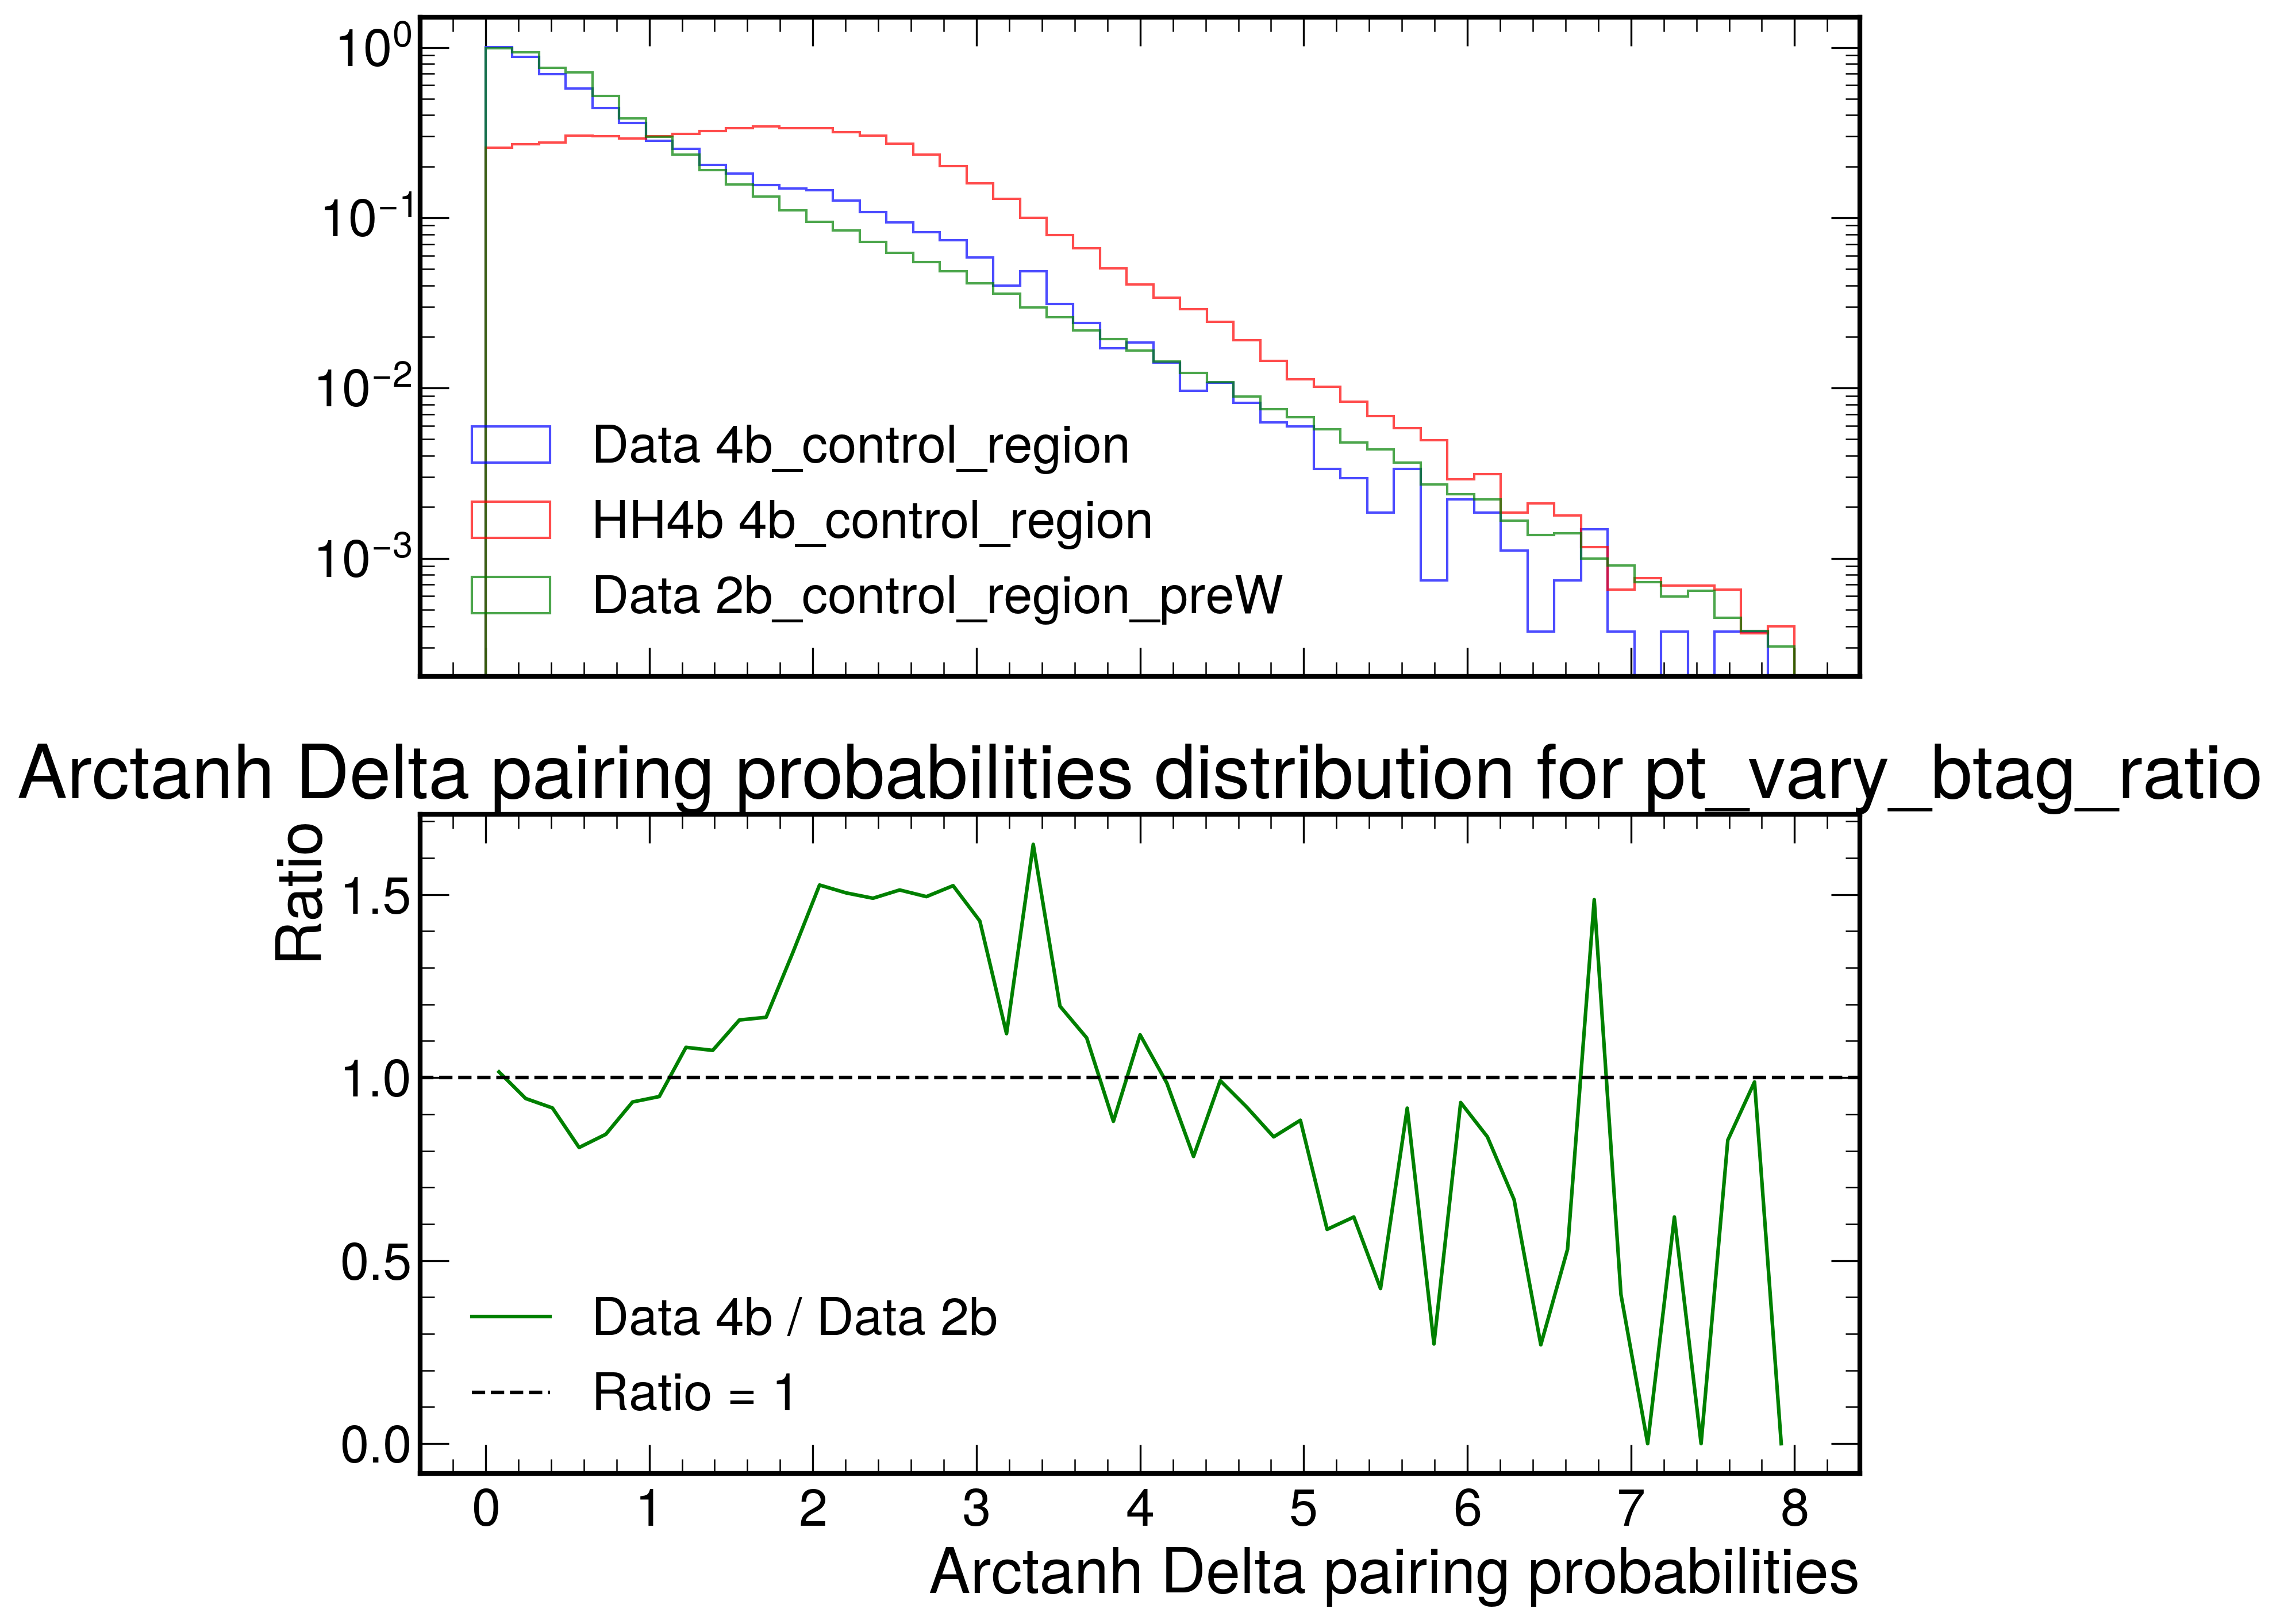

In [40]:
input_data = "/work/mmalucch/out_hh4b/SigBkg/out_2022postEE_ggFSPANetDataset_SPANETptVary0p3_1p7_Morphing_DNN_AN_1e-3_e20drop75_minDelta1em5_SPANet_only2022postEE_noEarlyStopping_20folds_DeltaProbabilityMorphing_SigBkg_DNN_ptFlatSPANet_class_weights_e5drop75_postEE_DeltaProbability/output_DATA_JetMET_JMENano_G_2022_postEE_EraG.coffea"
input_mc = "/work/mmalucch/out_hh4b/SigBkg/out_2022postEE_ggFSPANetDataset_SPANETptVary0p3_1p7_Morphing_DNN_AN_1e-3_e20drop75_minDelta1em5_SPANet_only2022postEE_noEarlyStopping_20folds_DeltaProbabilityMorphing_SigBkg_DNN_ptFlatSPANet_class_weights_e5drop75_postEE_DeltaProbability/output_GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE.coffea"

col_d, col_m, col_d2 = get_cols(input_data, input_mc, "pt_vary", "4b_signal_region", "2b_signal_region_preW")
col_d, col_m, col_d2 = get_cols(input_data, input_mc, "pt_vary", "4b_control_region", "2b_control_region_preW")


input_data = "/work/mmalucch/out_hh4b/btag_ratio/out_2022postEE_spanet_pt_vary_bratio_all/output_DATA_JetMET_JMENano_G_2022_postEE_EraG.coffea"
input_mc = "/work/mmalucch/out_hh4b/btag_ratio/out_2022postEE_spanet_pt_vary_bratio_all/output_GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE.coffea"

col_d_btag_ratio, col_m_btag_ratio, col_d2_btag_ratio = get_cols(input_data, input_mc, "pt_vary_btag_ratio", "4b_signal_region", "2b_signal_region_preW")
col_d_btag_ratio, col_m_btag_ratio, col_d2_btag_ratio = get_cols(input_data, input_mc, "pt_vary_btag_ratio", "4b_control_region", "2b_control_region_preW")